In [2]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [3]:
# uploading dataset
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [4]:
data=pd.read_csv("EastWestAirlines.csv",)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# **EDA**

In [5]:
# droping "ID#" column
data=data.drop("ID#",axis=1)

In [6]:
data.shape

(3999, 11)

In [7]:
data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
data.duplicated().sum()

1

In [10]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [11]:
# droping the duplicated row
data=data.drop_duplicates()

# **KMeans Clustering**

In [12]:
# importing KMeans Clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
kmeans_data=data

In [14]:
kmeans_data.shape

(3998, 11)

In [15]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans_scaled_data =scaler.fit_transform(kmeans_data)

In [16]:
kmeans_scaled_data

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

# Build Modeling

In [17]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(kmeans_scaled_data)

KMeans(n_clusters=4, random_state=0)

In [18]:
predict=kmeans.fit_predict(kmeans_scaled_data)

In [19]:
predict

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [20]:
kmeans.inertia_

27148.665385482615

**Hyper Parameter Tuning**

In [21]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  predict=kmeans.fit_predict(kmeans_scaled_data)
  wcss.append(kmeans.inertia_)

In [22]:
wcss

[43977.999999999985,
 35402.34837621176,
 30893.111681651782,
 27148.665385482615,
 23696.28142175274,
 21086.325857898286,
 19877.921691970358,
 17315.91571034139,
 15961.46088573225,
 14725.185611004516]

**elbow plot**

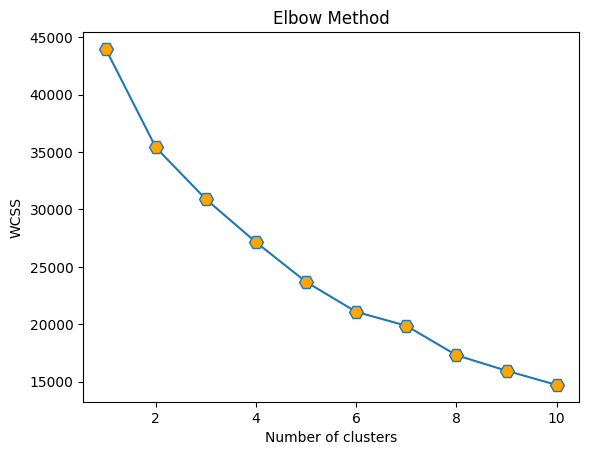

In [23]:
# elbow plot
plt.plot(range(1, 11), wcss,marker='H',markersize=10,markerfacecolor='orange')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**silhouette score**

In [24]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(kmeans_scaled_data)
    sil_score1= silhouette_score(kmeans_scaled_data, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32531882107641713
For n_clusters = 3 The average silhouette_score is : 0.3120743629337082
For n_clusters = 4 The average silhouette_score is : 0.31003837126661404
For n_clusters = 5 The average silhouette_score is : 0.32371282485521125
For n_clusters = 6 The average silhouette_score is : 0.33378006995858245
For n_clusters = 7 The average silhouette_score is : 0.22365222966492318
For n_clusters = 8 The average silhouette_score is : 0.237314726017899
For n_clusters = 9 The average silhouette_score is : 0.24489425763143474


In [25]:
# we taking number of cluster as 6
final_model=KMeans(n_clusters=6,random_state=0)
final_model.fit(kmeans_scaled_data)

KMeans(n_clusters=6, random_state=0)

In [26]:
final_model.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [27]:
# creating a new column Label
kmeans_data["kmeans_Label"]=final_model.labels_
kmeans_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_Label
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [28]:
# grouping by Labels
kmeans_grp=data.groupby('kmeans_Label')

In [29]:
for x,y in kmeans_grp:
  print(y)
  print('_'*60)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
42      60313           0          1          1          1        10000   
50     108137           0          1          1          1         6368   
65      53914           0          3          1          1        33767   
94     185549           0          5          1          1       110859   
112    124198           0          5          1          1        66330   
...       ...         ...        ...        ...        ...          ...   
3907   126490           0          1          1          1         8808   
3911    55922        2273          1          1          1         8104   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   
3950    59650           0          1          1          1         5050   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
42             26      

In [30]:
kmeans_grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
kmeans_Label,,,,,,,,,,,
0,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,43899.574007,43.575612,1.229844,1.000000,1.000401,4646.073004,6.855596,199.240273,0.621340,3707.224629,0.200963
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


In [31]:
sgrp=kmeans_data.groupby("Award?")

In [32]:
sgrp.agg("mean")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,kmeans_Label
Award?,,,,,,,,,,,
0,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,1.851808
1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.392302


In [33]:
count_df = kmeans_data.groupby(['kmeans_Label']).count()
count_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
kmeans_Label,,,,,,,,,,,
0,143,143,143,143,143,143,143,143,143,143,143
1,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
2,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493
3,43,43,43,43,43,43,43,43,43,43,43
4,15,15,15,15,15,15,15,15,15,15,15
5,61,61,61,61,61,61,61,61,61,61,61


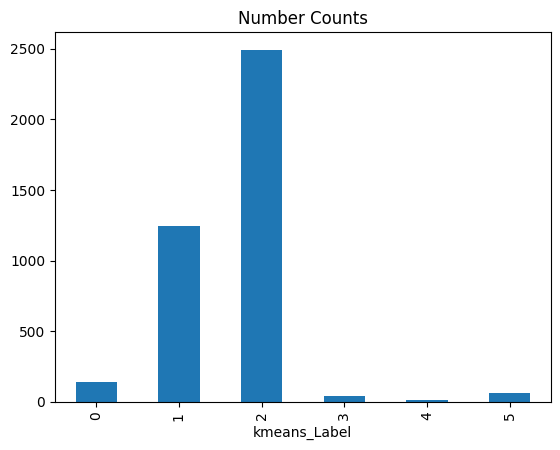

In [34]:
count = count_df.xs('Balance' ,axis = 1)
count.plot(kind='bar', title= 'Number Counts')
plt.show()

In [35]:
silhouette_avg = silhouette_score(kmeans_scaled_data, final_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.33378006995858245


# **Hierarchical clustering**

In [36]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [37]:
data=pd.read_csv("EastWestAirlines.csv",)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [38]:
hiera_data=data.drop("ID#",axis=1)

In [39]:
hiera_data=hiera_data.drop_duplicates()

In [40]:
hiera_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [41]:
#scailing the data using MinMax scalar
scaler=MinMaxScaler()
hiera_scaled_data=scaler.fit_transform(hiera_data)
hiera_scaled_data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# Silhouette Score

In [42]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(hiera_scaled_data)
        silhouette_score1 = silhouette_score(hiera_scaled_data, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

chooding cluster 2 with linkage- single

# Model Building

In [43]:
# create clusters
hc_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')

In [44]:
hc_model.fit(hiera_scaled_data)

AgglomerativeClustering(affinity='euclidean', linkage='single')

In [45]:
hc_model.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [46]:
hiera_data["hiera_Label"]=hc_model.labels_
hiera_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hiera_Label
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [47]:
# grouping by Labels
hiera_grp=hiera_data.groupby('hiera_Label')

In [48]:
for x,y in hiera_grp:
  print(y)
  print('_'*60)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4       97752           0          4          1          1        43300   
7       20856           0          1          1          1         5250   
8      443003           0          3          2          1         1753   
9      104860           0          3          1          1        28426   
11      96522           0          5          1          1        61105   
...       ...         ...        ...        ...        ...          ...   
3987    11933           0          1          1          1          249   
3989     2622           0          1          1          1         1625   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26      

In [49]:
hiera_grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
hiera_Label,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0


In [50]:
count_df = hiera_data.groupby(['hiera_Label']).count()
count_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
hiera_Label,,,,,,,,,,,
0,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481
1,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517


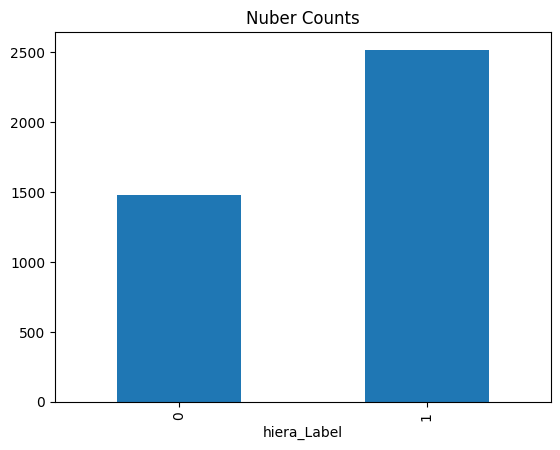

In [51]:
count = count_df.xs('Balance' ,axis = 1)
count.plot(kind='bar', title= 'Nuber Counts')
plt.show()

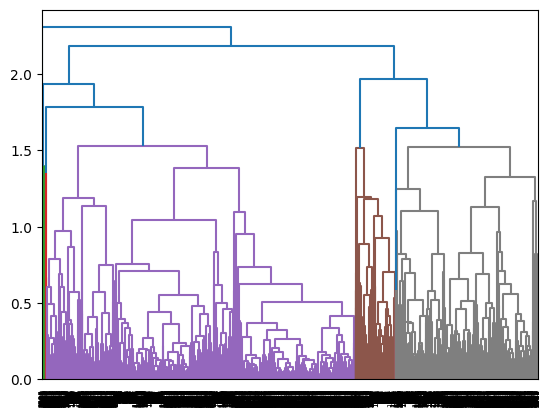

In [52]:
hiera=hierarchy.linkage(hiera_scaled_data,method='complete')
dendrogram=hierarchy.dendrogram(hiera)

In [53]:
silhouette_avg = silhouette_score(hiera_scaled_data, hc_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.535888544052936


# **DBSCAN**

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
data=pd.read_csv("EastWestAirlines.csv",)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [56]:
dbscan_data=data.drop("ID#",axis=1)

In [57]:
dbscan_data=dbscan_data.drop_duplicates()

In [58]:
dbscan_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [59]:
#scailing the data using MinMax scalar
scaler=MinMaxScaler()
dbscan_scaled_data=scaler.fit_transform(dbscan_data)
dbscan_scaled_data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [60]:
dbscan_model=DBSCAN(min_samples=12,eps=0.5 )

In [61]:
dbscan_model.fit(dbscan_scaled_data)

DBSCAN(min_samples=12)

In [62]:
dbscan_model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [63]:
dbscan_data["dbscan_Label"]=dbscan_model.labels_
dbscan_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan_Label
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [64]:
# grouping by Labels
dbscan_grp=dbscan_data.groupby('dbscan_Label')

In [65]:
for x,y in dbscan_grp:
  print(y)
  print('_'*60)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
106     96627        1182          1          1          3        49059   
198      8669           0          1          3          1        11397   
226    117329           0          1          2          1         6448   
275   1704838           0          1          1          1        17108   
381    167670           0          1          3          1        15907   
384     28193           0          5          1          4       103456   
392     11189           0          1          2          1         9044   
561    380930           0          2          2          1        22485   
850     25629           0          4          1          5       107308   
904     15835           0          2          1          5       112171   
940     44824           0          1          3          1        21107   
1036   154664           0

In [66]:
dbscan_grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
dbscan_Label,,,,,,,,,,,
-1,138682.021277,75.957447,1.957447,1.893617,1.93617,49014.787234,26.489362,2438.042553,7.000000,4212.085106,0.659574
0,59604.882093,88.765795,1.709457,1.000000,1.00161,10057.234205,9.059155,226.661569,0.651911,3824.279276,0.000000
1,95908.293793,242.869655,2.675172,1.000000,1.00069,28358.131034,15.464138,799.014483,2.435172,4628.304138,1.000000
2,39218.500000,0.000000,1.000000,2.000000,1.00000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000


In [67]:
silhouette_avg = silhouette_score(dbscan_scaled_data, dbscan_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3340216337736371


# **INFERENCES**

*   KMEANS Clustering :-\
 number of cluster=6\
 Silhouette Score: 0.33378006995858245

*   Hierarchical clustering:-\
 number of clustering=2\
 Silhouette Score: 0.535888544052936

*   DBSCAN Clustering:-\
 Silhouette Score: 0.3340216337736371






